In [4]:
import sys
!{sys.executable} -m pip install librosa

  Using cached librosa-0.8.0.tar.gz (183 kB)
  Using cached audioread-2.1.8.tar.gz (21 kB)
     |████████████████████████████████| 15.3 MB 6.7 MB/s eta 0:00:01    |████████████                    | 5.7 MB 1.9 MB/s eta 0:00:06
     |████████████████████████████████| 7.2 MB 121 kB/s eta 0:00:011
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
     |████████████████████████████████| 2.2 MB 21.0 MB/s eta 0:00:01
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-macosx_10_5_x86_64.macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl (613 kB)
  Using cached pooch-1.2.0-py3-none-any.whl (47 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 18.4 MB 8.8 MB/s eta 0:00:011    |███▊                            | 2.1 MB 22.3 MB/s eta 0:00:01     |█████████████████████▉          | 12.6 MB 22.3 MB/s eta 0:00:01
     |████████████████████████

In [11]:
import librosa

In [44]:
filepath = "midiOboeC5.wav"
samples, samplingRate = librosa.load(filepath, sr = None, mono = False, 
                                     offset = 0.0, duration = None)
len(samples), samplingRate

(2, 44100)

In [45]:
duration = len(samples) / samplingRate
print(duration, " seconds")

4.5351473922902495e-05  seconds


In [46]:
from IPython.display import Audio
Audio(filepath)

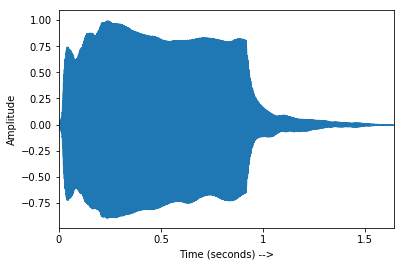

In [47]:
from librosa import display
import matplotlib.pyplot as plt
plt.figure()
librosa.display.waveplot(y = samples, sr = samplingRate)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

In [48]:
import numpy as np

<function matplotlib.pyplot.show(*args, **kw)>

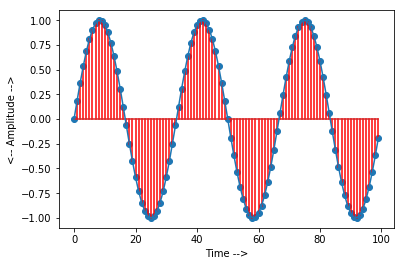

In [49]:
samplesTest = 100
f = 3
x = np.arange(samplesTest)
y1 = np.sin(2*np.pi*f* (x/samplesTest))
plt.figure()
plt.stem(x, y1, 'r', )
plt.plot(x, y1)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show

In [50]:
import scipy

In [51]:
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    plt.xlim({0, 5000})
    return plt.show()

In [52]:
print(len(y1))

100


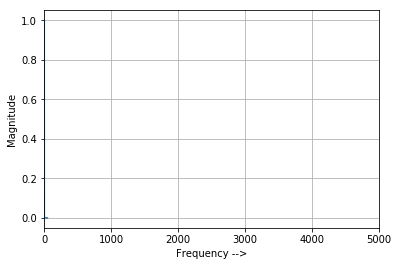

In [53]:
fft_plot(y1, 100.0)

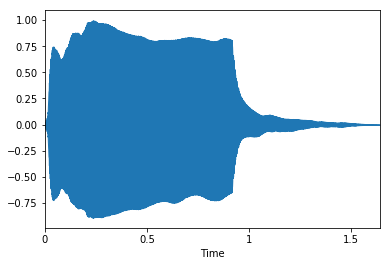

In [54]:
librosa.display.waveplot(y = samples, sr = samplingRate)

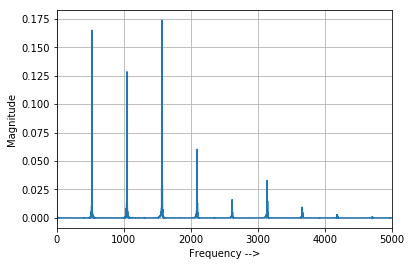

In [55]:
fft_plot(samples[0], samplingRate)

In [56]:
filepath2 = "midiOboeC4.wav"
samples2, samplingRate2 = librosa.load(filepath2, sr = None, mono = False, 
                                     offset = 0.0, duration = None)
len(samples2), samplingRate2

(2, 44100)

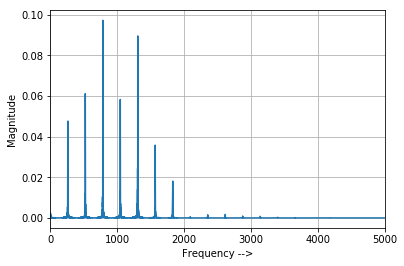

In [57]:
fft_plot(samples2[0], samplingRate2)

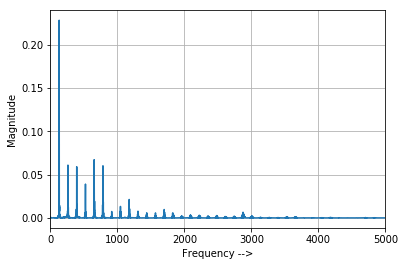

In [58]:
filepath3 = "midiCelloC3.wav"
samples3, samplingRate3 = librosa.load(filepath3, sr = None, mono = False, offset = 0.0, duration = None)
fft_plot(samples3[0], samplingRate3)

In [62]:
def getFftArr(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    return (xf, 2.0/n * np.abs(yf[:n//2]))

In [63]:
print(getFftArr(samples3[0], samplingRate3))

(array([0.00000000e+00, 4.09523986e-01, 8.19047973e-01, ...,
       2.20491810e+04, 2.20495905e+04, 2.20500000e+04]), array([2.45696982e-04, 5.02867481e-04, 2.20226833e-04, ...,
       2.49724201e-06, 3.13073919e-06, 3.13816737e-06]))


In [141]:
def getFftArr2(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    output = np.dstack((xf, 2.0/n * np.abs(yf[:n//2])))
    output1 = 2.0/n * np.abs(yf[:n//2])
    return (output, output1)

In [142]:
print(getFftArr2(samples3[0], samplingRate3)[0])

[[[0.00000000e+00 2.45696982e-04]
  [4.09523986e-01 5.02867481e-04]
  [8.19047973e-01 2.20226833e-04]
  ...
  [2.20491810e+04 2.49724201e-06]
  [2.20495905e+04 3.13073919e-06]
  [2.20500000e+04 3.13816737e-06]]]


In [143]:
import functools

In [144]:
print(type(getFftArr2(samples3[0], samplingRate3)[0].tolist()[0]))

<class 'list'>


In [145]:
def getFftList(audio, sampling_rate):
    x = getFftArr2(audio, sampling_rate)[0].tolist()[0]
    return(list(filter(lambda a: a[1] > 0.001, x)))

In [137]:
print(getFftList(samples3[0], samplingRate3))

[[107.29528443808852, 0.001149099301449045], [108.11433241089836, 0.0013123557616074495], [108.93338038370818, 0.0012964937685264481], [109.75242835651802, 0.0013182412031582415], [110.57147632932787, 0.001175846665235127], [111.39052430213769, 0.0011798362390087738], [111.80004828854261, 0.0011775459013271432], [112.20957227494753, 0.0012912100431580224], [112.61909626135245, 0.0014397284472931326], [113.02862024775736, 0.0013577578825888837], [113.43814423416228, 0.0017054415538083792], [113.8476682205672, 0.0012684063661351703], [114.25719220697212, 0.0018529812206067439], [114.66671619337704, 0.0011598108922707784], [115.07624017978196, 0.002022748804674862], [115.48576416618687, 0.0010475381255099945], [115.89528815259179, 0.002066611397469397], [116.71433612540163, 0.0019287415936554363], [117.12386011180655, 0.0011004256785276403], [117.53338409821147, 0.002262361582198842], [117.94290808461638, 0.00139063077116128], [118.3524320710213, 0.002090599557007966], [118.76195605742622

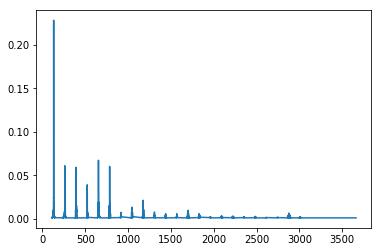

In [138]:
plt.figure()
freqX = []
freqY = []
for j in (getFftList(samples3[0], samplingRate3)):
    freqX.append(j[0])
    freqY.append(j[1])
plt.plot(freqX, freqY)
plt.show()

In [140]:
pip install PeakUtils

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [155]:
import peakutils
[twoD, oneD] = getFftArr2(samples3[0], samplingRate3)
peaks_ind1 = peakutils.indexes(oneD, thres=0.01, min_dist=40)
print(peaks_ind1)
listSize = len(peaks_ind1)
scale = oneD[peaks_ind1[0]]
overtoneAmpList = list(map((lambda x: oneD[x]/scale), peaks_ind1))
print(overtoneAmpList)

[ 319  638  958 1277 1596 1915 2234 2553 2872 3192 3511 3830 4149 4456
 4788 5107 5427 5746 6065 7023]
[1.0, 0.26716226558865647, 0.2588786146623298, 0.17102321860801092, 0.2947266079768604, 0.2635571924982485, 0.0325234370816962, 0.058059993477039, 0.0933008385751412, 0.03405989526849088, 0.02568113128859212, 0.025312513568868125, 0.04246601588403938, 0.02433372880404131, 0.010187631792575935, 0.015475465678827204, 0.0136819438272833, 0.010180256033358565, 0.011968196443647282, 0.02870618563651795]
